In [1]:
import requests
x = requests.get('https://w3schools.com')
print(x)
print(x.status_code)  # request에 대한 status_code확인 (200 : success)

<Response [200]>
200


In [2]:
import requests
# the required first parameter of the 'get' method is the 'url'
x = requests.get('https://w3schools.com/python/demopage.htm')
# print the header
print(x.headers)

{'Content-Encoding': 'gzip', 'Accept-Ranges': 'bytes', 'Age': '9547', 'Cache-Control': 'public,max-age=14400,public', 'Content-Security-Policy': "frame-ancestors 'self' https://mycourses.w3schools.com;", 'Content-Type': 'text/html', 'Date': 'Wed, 26 May 2021 18:38:14 GMT', 'Etag': '"1aa65348c71ad51:0"', 'Last-Modified': 'Tue, 04 Jun 2019 11:18:49 GMT', 'Server': 'ECS (tkb/733E)', 'Vary': 'Accept-Encoding', 'X-Cache': 'HIT', 'X-Content-Security-Policy': "frame-ancestors 'self' https://mycourses.w3schools.com;", 'X-Powered-By': 'ASP.NET', 'Content-Length': '178'}


In [3]:
import requests
# the required first parameter of the 'get' method is the 'url'
x = requests.get('https://w3schools.com/python/demopage.htm')

# print the response text (the content of the requested file)
print(x.text)

<!DOCTYPE html>
<html>
<body>

<h1>This is a Test Page</h1>

</body>
</html>


In [4]:
import requests
from bs4 import BeautifulSoup

# 크롤링할 사이트 주소를 정의
source_url = "https://namu.wiki/RecentChanges"
req = requests.get(source_url)
html = req.content   # Response 의 body를 binary 파일 형태로 access, 자동으로 decoding
soup = BeautifulSoup(html, 'lxml')
contents_table = soup.find(name='table')
table_body = contents_table.find(name = 'tbody')
table_rows = table_body.find_all(name = 'tr')

# a 태그의 href속성을 리스트로 추출, 크롤링할 페이지 리스트를 생성
page_url_base = 'https://namu.wiki'
page_urls = []
for index in range(0, len(table_rows)):
    first_td = table_rows[index].find_all('td')[0]
    td_url = first_td.find_all('a')
    if len(td_url) > 0:
        page_url = page_url_base + td_url[0].get('href')
        if 'png' not in page_url:  # not image link
            page_urls.append(page_url)

# 중복 url 제거 (using set)
page_urls = list(set(page_urls))
for page in page_urls[:5]:
    print(page)

https://namu.wiki/w/%EC%A4%91%EC%95%99%EB%8C%80%ED%95%99%EA%B5%90/%EC%B6%9C%EC%8B%A0%20%EC%9D%B8%EB%AC%BC
https://namu.wiki/w/%ED%9C%B4%EC%A7%80%ED%86%B5:2105279
https://namu.wiki/w/%ED%9C%B4%EC%A7%80%ED%86%B5:2105275
https://namu.wiki/w/%EA%B9%80%EC%83%81%EC%8B%9D(%EC%B6%95%EA%B5%AC)
https://namu.wiki/w/%ED%8C%8C%EC%9D%BC:card_2164.jpg


In [5]:
# 하나의 최근 변경된 문서를 크롤링
req = requests.get(page_urls[0])
html = req.content
soup = BeautifulSoup(html, 'lxml')
contents_table = soup.find(name = 'article')
title = contents_table.find_all('h1')[0]
content_paragraphs = contents_table.find_all(name = 'div', attrs = {"class":"wiki-paragraph"})
content_corpus_list = []

for paragraphs in content_paragraphs:
    content_corpus_list.append(paragraphs.text)
content_corpus = "".join(content_corpus_list)

print(title.text)
print('\n')
print(content_corpus)

중앙대학교/출신 인물 


   상위 문서: 중앙대학교 [ 펼치기 · 접기 ]캠퍼스서울캠퍼스안성캠퍼스학교 정보기숙사역사학부대학원총학생회동아리사건사고학내언론웹사이트출신인물부속기관중앙대학교병원중앙대학교광명병원 (예정)중앙대학교사범대학부속초등학교중앙대학교사범대학부속중학교중앙대학교사범대학부속고등학교협력기관중앙대학교의료원 교육협력 현대병원캠퍼스서울캠퍼스안성캠퍼스학교 정보기숙사역사학부대학원총학생회동아리사건사고학내언론웹사이트출신인물부속기관중앙대학교병원중앙대학교광명병원 (예정)중앙대학교사범대학부속초등학교중앙대학교사범대학부속중학교중앙대학교사범대학부속고등학교협력기관중앙대학교의료원 교육협력 현대병원1. 개요2. 가이드3. 서라벌예술대학4. 정치/언론/경제/법조계4.1. 정치/행정4.2. 언론4.3. 경제4.4. 법조5. 의약계6. 교육/문화/예술계6.1. 교육6.2. 문화/예술7. 방송/연예계8. 체육계8.1. 스포츠8.2. E스포츠신문방송학과, 약학계, 방송예술계, 상경계에서 두각을 보인다.중앙대학교 출신 유명인이 출연한 영상이다.중앙대학교 출신의 유명 인물들을 정리한 문서. "이름 (학과) - 직업 혹은 동명이인과 구분하기 위한 부연설명" 형태로 작성하기로 한다.  김도향 (서라벌예대 연극영화) - 가수 김동리 (서라벌예대 명예박사) - 소설가, 대학교수 (중앙대 서라벌예대 교수, 예술대학장 역임)김원일 (서라벌예대 문예창작) - 소설가김주영 (서라벌예대 문예창작) - 소설가김흥기 (서라벌예대 연극영화) - 배우남기남 (서라벌예대 연극영화) – 영화감독박근형 (서라벌예대 연극영화) - 배우박상륭 (서라벌예대 문예창작) - 작가박인환 (서라벌예대 연극영화) - 배우백윤식 (서라벌예대 연극영화) - 배우서인석 (서라벌예대 연극) - 배우선우용녀 (서라벌예대 연극) - 배우송도순 (서라벌예대 연극) - KBS 성우송수권 (서라벌예대 문예창작) - 시인양인자 (서라벌예대 문예창작) - 작사가오정희 (서라벌예대 문예창작) - 소설가유현종 (서라벌예대 문예창작) - 소설가윤문식 (서라벌

In [6]:
# 하나의 최근 변경된 문서를 크롤링
req = requests.get(page_urls[0])
html = req.content
soup = BeautifulSoup(html, 'lxml')
contents_table = soup.find(name = 'article')
title = contents_table.find_all('h1')[0]
sub_title = contents_table.find_all('h2')[0]  #subtitle
content_paragraphs = contents_table.find_all(name = 'div', attrs = {"class":"wiki-paragraph"})
content_corpus_list = []

for paragraphs in content_paragraphs:
    content_corpus_list.append(paragraphs.text)
content_corpus = "".join(content_corpus_list)

print(title.text)
print('\n')
print(sub_title.text)
print('\n')
print(content_corpus)

중앙대학교/출신 인물 


분류


   상위 문서: 중앙대학교 [ 펼치기 · 접기 ]캠퍼스서울캠퍼스안성캠퍼스학교 정보기숙사역사학부대학원총학생회동아리사건사고학내언론웹사이트출신인물부속기관중앙대학교병원중앙대학교광명병원 (예정)중앙대학교사범대학부속초등학교중앙대학교사범대학부속중학교중앙대학교사범대학부속고등학교협력기관중앙대학교의료원 교육협력 현대병원캠퍼스서울캠퍼스안성캠퍼스학교 정보기숙사역사학부대학원총학생회동아리사건사고학내언론웹사이트출신인물부속기관중앙대학교병원중앙대학교광명병원 (예정)중앙대학교사범대학부속초등학교중앙대학교사범대학부속중학교중앙대학교사범대학부속고등학교협력기관중앙대학교의료원 교육협력 현대병원1. 개요2. 가이드3. 서라벌예술대학4. 정치/언론/경제/법조계4.1. 정치/행정4.2. 언론4.3. 경제4.4. 법조5. 의약계6. 교육/문화/예술계6.1. 교육6.2. 문화/예술7. 방송/연예계8. 체육계8.1. 스포츠8.2. E스포츠신문방송학과, 약학계, 방송예술계, 상경계에서 두각을 보인다.중앙대학교 출신 유명인이 출연한 영상이다.중앙대학교 출신의 유명 인물들을 정리한 문서. "이름 (학과) - 직업 혹은 동명이인과 구분하기 위한 부연설명" 형태로 작성하기로 한다.  김도향 (서라벌예대 연극영화) - 가수 김동리 (서라벌예대 명예박사) - 소설가, 대학교수 (중앙대 서라벌예대 교수, 예술대학장 역임)김원일 (서라벌예대 문예창작) - 소설가김주영 (서라벌예대 문예창작) - 소설가김흥기 (서라벌예대 연극영화) - 배우남기남 (서라벌예대 연극영화) – 영화감독박근형 (서라벌예대 연극영화) - 배우박상륭 (서라벌예대 문예창작) - 작가박인환 (서라벌예대 연극영화) - 배우백윤식 (서라벌예대 연극영화) - 배우서인석 (서라벌예대 연극) - 배우선우용녀 (서라벌예대 연극) - 배우송도순 (서라벌예대 연극) - KBS 성우송수권 (서라벌예대 문예창작) - 시인양인자 (서라벌예대 문예창작) - 작사가오정희 (서라벌예대 문예창작) - 소설가유현종 (서라벌예대 문예창작) - 소설가윤문식

In [7]:
%matplotlib inline
# Jupyter notebook 을 실행한 browser에 바로 그림이 그려지도록 해주는 코드

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore") #Error가 아닌 warning들을 무시
import requests
from bs4 import BeautifulSoup
import re   # regular expression

# 크롤링할 사이트 주소 정의
source_url = "https://namu.wiki/RecentChanges"

#사이트의 html구조에 기반해 크롤링 수행
req = requests.get(source_url)
html = req.content
soup = BeautifulSoup(html, 'lxml')
contents_table = soup.find(name = 'table')
table_body = contents_table.find(name = 'tbody')
table_rows = table_body.find_all(name= 'tr')
print(table_rows)

[<tr data-v-36de48c1=""><td data-v-36de48c1=""><a data-v-36de48c1="" href="/w/%EC%84%B8%EA%B3%84%EC%9D%98%20%ED%99%94%EC%95%BD%EA%B3%A0">세계의 화약고</a> <a data-v-36de48c1="" href="/history/%EC%84%B8%EA%B3%84%EC%9D%98%20%ED%99%94%EC%95%BD%EA%B3%A0">[역사]</a> <a data-v-36de48c1="" href="/diff/%EC%84%B8%EA%B3%84%EC%9D%98%20%ED%99%94%EC%95%BD%EA%B3%A0?rev=925&amp;oldrev=924">[비교]</a> <a data-v-36de48c1="" href="/discuss/%EC%84%B8%EA%B3%84%EC%9D%98%20%ED%99%94%EC%95%BD%EA%B3%A0">[토론]</a> <span data-v-36de48c1="">(<span class="m" data-v-36de48c1="" data-v-3ee54395="">-1</span>)</span></td> <td data-v-36de48c1=""><div class="v-popover" data-v-36de48c1="" data-v-38195e46=""><div aria-describedby="popover_6bblc3vxq1" class="trigger" style="display:inline-block;"><a class="u" data-v-38195e46="">Nofumicki</a> </div> <div aria-hidden="true" class="tooltip popover vue-popover-theme" id="popover_6bblc3vxq1" style="visibility:hidden;display:none;" tabindex="0"><div class="wrapper"><div class="tooltip-inn

In [8]:
# a 태그의 href 속성을 리스트로 추출, 크롤링할 페이지 리스트 생성
page_url_base = "https://namu.wiki"
page_urls = []
for index in range(0, len(table_rows)):
    first_td = table_rows[index].find_all('td')[0]
    td_url = first_td.find_all('a')
    if len(td_url) > 0:
        page_url = page_url_base + td_url[0].get('href')
        if 'png' not in page_url:
            page_urls.append(page_url)
#중복 url 제거
page_urls = list(set(page_urls))
for page in page_urls[:5]:
    print(page)

https://namu.wiki/w/%EC%A4%91%EC%95%99%EB%8C%80%ED%95%99%EA%B5%90/%EC%B6%9C%EC%8B%A0%20%EC%9D%B8%EB%AC%BC
https://namu.wiki/w/%ED%9C%B4%EC%A7%80%ED%86%B5:2105279
https://namu.wiki/w/%ED%9C%B4%EC%A7%80%ED%86%B5:2105275
https://namu.wiki/w/%EA%B9%80%EC%83%81%EC%8B%9D(%EC%B6%95%EA%B5%AC)
https://namu.wiki/w/%ED%8C%8C%EC%9D%BC:card_2164.jpg


In [9]:
import pandas as pd
columns = ['title', 'category', 'content_text']
df = pd.DataFrame(columns = columns)
#각 페이지별 '제목', '카테고리', '본문' 정보를 데이터 프레임으로 만든다.
for page_url in page_urls:
    #사이트 html 구조에 기반해서 크롤링 수행
    req = requests.get(page_url)
    html = req.content
    soup = BeautifulSoup(html, 'lxml')
    contents_table = soup.find(name = 'article')
    title = contents_table.find_all('h1')[0]
    
    #카테고리 정보가 없는 경우 확인
    if len(contents_table.find_all('ul')) > 0:
        category = contents_table.find_all('ul')[0]
    else:
        category = None
    content_paragraphs = contents_table.find_all(name = 'div', attrs = {"class":"wiki-paragraph"})
    content_corpus_list = []
    
    #페이지 내 제목 정보에서 개행 문자를 제거한 뒤 추출. 만약 없는 경우, 빈 문자열로 대체
    if title is not None:
        row_title = title.text.replace('\n', ' ')
    else:
        row_title = ''
    
    # 페이지 내 본문 정보에서 개행 문자를 제거한 뒤 추출합니다. 만약 없는 경우, 빈 문자열로 대체
    if content_paragraphs is not None:
        for paragraphs in content_paragraphs:
            if paragraphs is not None:
                content_corpus_list.append(paragraphs.text.replace('\n',' '))
            else:
                content_corpus_list.append("")
    else:
        content_corpus_list.append("")
    
    # 페이지 내 카테고리 정보에서 "분류"라는 단어와 개행 문자를 제거한 뒤 추출
    # 만약 없는 경우 빈 문자열로 대체
    if category is not None:
        row_category = category.text.replace('\n', ' ')
    else:
        row_category = ''
    
    #모든 정보를 하나의 데이터 프레임에 저장.
    row = [row_title, row_category, "".join(content_corpus_list)]
    series = pd.Series(row, index=df.columns)
    df = df.append(series, ignore_index = True)

In [10]:
# 데이터 프레임을 출력
df.head(10)

,title,category,content_text
0,중앙대학교/출신 인물,중앙대학교 출신,상위 문서: 중앙대학교 [ 펼치기 · 접기 ]캠퍼스서울캠퍼스안성캠퍼스학교 정보...
1,휴지통:2105279,,
2,휴지통:2105275,,
3,김상식(축구),"1976년 출생해남군 출신 인물대한민국의 축구선수대한민국의 축구감독성남 FC/은퇴,...",은(는) 여기로 연결됩니다. 대한민국의 농구인에 대한 내용은 김상식(농구) 문...
4,파일:card_2164.jpg,파일/걸 프렌드(베타),이 파일은 나무위키에서 제한된 한도 안에서 쓰입니다.본 이미지는 퍼블릭 도메인 혹은...
5,파일:복원 스킬이 만능 치트화 만화2.jpg,파일/만화,이 파일은 나무위키에서 제한된 한도 안에서 쓰입니다.본 이미지는 퍼블릭 도메인 혹은...
6,동네 누나,2018년 웹툰탑툰성인 만화피카레스크(장르),탑툰의 성인 연재작월화수목금토일작품보기가출 가족그녀가 알고싶다나성기의 스터디동네 ...
7,김태환(2000),2000년 출생대한민국의 축구선수수원 삼성 블루윙즈/현역대한민국의 개신교 신자/ㄱ매...,동명의 울산 현대 소속 축구선수는 김태환 문서로수원 삼성 블루윙즈 2021 시즌 스...
8,호시나 아이,AV 여배우/ㅎ1995년 출생도쿄도 출신 인물,"주의. 성(性)적인 요소가 있습니다.이 표제어에는 성(性)적인 요소가 있기 때문에,..."
9,레나 잭슨,어글리후드/등장인물,이 문서에 스포일러가 포함되어 있습니다.이 문서가 설명하는 작품이나 인물 등에 대한...


In [11]:
# 텍스트 정제 함수 : 한글 이외의 문자는 전부 제거합니다.
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
    result = hangul.sub('',text) #한글과 띄어쓰기를 제외한 모든 부분을 제거
    return result

In [12]:
print(text_cleaning(df['content_text'][0]))

  상위 문서 중앙대학교  펼치기  접기 캠퍼스서울캠퍼스안성캠퍼스학교 정보기숙사역사학부대학원총학생회동아리사건사고학내언론웹사이트출신인물부속기관중앙대학교병원중앙대학교광명병원 예정중앙대학교사범대학부속초등학교중앙대학교사범대학부속중학교중앙대학교사범대학부속고등학교협력기관중앙대학교의료원 교육협력 현대병원캠퍼스서울캠퍼스안성캠퍼스학교 정보기숙사역사학부대학원총학생회동아리사건사고학내언론웹사이트출신인물부속기관중앙대학교병원중앙대학교광명병원 예정중앙대학교사범대학부속초등학교중앙대학교사범대학부속중학교중앙대학교사범대학부속고등학교협력기관중앙대학교의료원 교육협력 현대병원 개요 가이드 서라벌예술대학 정치언론경제법조계 정치행정 언론 경제 법조 의약계 교육문화예술계 교육 문화예술 방송연예계 체육계 스포츠 스포츠신문방송학과 약학계 방송예술계 상경계에서 두각을 보인다중앙대학교 출신 유명인이 출연한 영상이다중앙대학교 출신의 유명 인물들을 정리한 문서 이름 학과  직업 혹은 동명이인과 구분하기 위한 부연설명 형태로 작성하기로 한다  김도향 서라벌예대 연극영화  가수 김동리 서라벌예대 명예박사  소설가 대학교수 중앙대 서라벌예대 교수 예술대학장 역임김원일 서라벌예대 문예창작  소설가김주영 서라벌예대 문예창작  소설가김흥기 서라벌예대 연극영화  배우남기남 서라벌예대 연극영화  영화감독박근형 서라벌예대 연극영화  배우박상륭 서라벌예대 문예창작  작가박인환 서라벌예대 연극영화  배우백윤식 서라벌예대 연극영화  배우서인석 서라벌예대 연극  배우선우용녀 서라벌예대 연극  배우송도순 서라벌예대 연극   성우송수권 서라벌예대 문예창작  시인양인자 서라벌예대 문예창작  작사가오정희 서라벌예대 문예창작  소설가유현종 서라벌예대 문예창작  소설가윤문식 서라벌예대 연극영화  탤런트 연극배우이근배 서라벌예대 문예창작  시조 시인이문구 서라벌예대 문예창작  소설가 관촌수필 집필이원세 서라벌예대 연극영화  영화감독이이화 서라벌예대 문예창작  역사학자이정길 서라벌예대 연극영화  배우임채무 서라벌예대 연극영화  배우정재호 서라별예대 문

In [13]:
# 각 피처마다 데이터 전처리를 적용
df['title'] = df['title'].apply(lambda x: text_cleaning(x))
df['category'] = df['category'].apply(lambda x: text_cleaning(x))
df['content_text'] = df['content_text'].apply(lambda x: text_cleaning(x))
df.head(10)

,title,category,content_text
0,중앙대학교출신 인물,중앙대학교 출신,상위 문서 중앙대학교 펼치기 접기 캠퍼스서울캠퍼스안성캠퍼스학교 정보기숙사역사...
1,휴지통,,
2,휴지통,,
3,김상식축구,년 출생해남군 출신 인물대한민국의 축구선수대한민국의 축구감독성남 은퇴 이적상무 축구...,은는 여기로 연결됩니다 대한민국의 농구인에 대한 내용은 김상식농구 문서를의 번 ...
4,파일,파일걸 프렌드베타,이 파일은 나무위키에서 제한된 한도 안에서 쓰입니다본 이미지는 퍼블릭 도메인 혹은 ...
5,파일복원 스킬이 만능 치트화 만화,파일만화,이 파일은 나무위키에서 제한된 한도 안에서 쓰입니다본 이미지는 퍼블릭 도메인 혹은 ...
6,동네 누나,년 웹툰탑툰성인 만화피카레스크장르,탑툰의 성인 연재작월화수목금토일작품보기가출 가족그녀가 알고싶다나성기의 스터디동네 ...
7,김태환,년 출생대한민국의 축구선수수원 삼성 블루윙즈현역대한민국의 개신교 신자ㄱ매탄고등학교 출신,동명의 울산 현대 소속 축구선수는 김태환 문서로수원 삼성 블루윙즈 시즌 스쿼드 ...
8,호시나 아이,여배우ㅎ년 출생도쿄도 출신 인물,주의 성적인 요소가 있습니다이 표제어에는 성적인 요소가 있기 때문에 대한민국의 주요...
9,레나 잭슨,어글리후드등장인물,이 문서에 스포일러가 포함되어 있습니다이 문서가 설명하는 작품이나 인물 등에 대한 ...


In [14]:
# corpus 생성
# 각 feature마다 말 뭉치 생성
title_corpus = ''.join(df['title'].tolist())
category_corpus = ''.join(df['category'].tolist())
content_corpus = ''.join(df['content_text'].tolist())
print(title_corpus)

중앙대학교출신 인물 휴지통 휴지통 김상식축구 파일 파일복원 스킬이 만능 치트화 만화 동네 누나 김태환 호시나 아이 레나 잭슨 보리스 타쉬 세계의 화약고 마차시 세 테일즈런너역사년 파일복원 스킬이 만능 치트화 만화 줄리아 마틴 진주 버스  파일붉게 물든 매화 파일 이재성클럽 경력 일베저장소사회게시판 마인크래프트아이템장식 블록 파일새의 여왕 신쿠베라 파일믹나도하 젤다젤다의 전설 브레스 오브 더 와일드 시리즈 파일복원 스킬이 만능 치트화 만화 공우진 양현종선수 경력년 미타니 아카리 임상협 휴지통 패밀리 가이 동남권 광역전철 분류 카가와 테루유키 진주 버스  파일복원 스킬이 만능 치트화 권 돈 밝히는 규진이 효문고등학교 원신무기한손검 휴지통 파일 휴지통 파일 제차 란테마리오 성역 회전 독가스 파일복원 스킬이 만능 치트화 권 터키 마피아 파일복원 스킬이 만능 치트화 권 휴지통 휴지통 파일  휴지통 고로켓 파일복원 스킬이 만능 치트화 권 이인제계 파일복원 스킬이 만능 치트화 권 세라 그린마일 한유섬년   타이젬 한중슈퍼리그 외계인 야마네 아야 진주 버스  나락월드 오브 워크래프트 파일 노에미 고려대학교 민족문화연구원 가면라이더 세이버가면라이더 세이버폼 가우르 구라 파일 


In [15]:
from konlpy.tag import Hannanum
hannanum = Hannanum()
print(hannanum.analyze(u'나는 파이썬을 공부한다'))

[[[('나', 'ncn'), ('는', 'jxc')], [('나', 'npp'), ('는', 'jxc')], [('나', 'pvg'), ('는', 'etm')], [('나', 'px'), ('는', 'etm')], [('나', 'pvg'), ('아', 'ecs'), ('는', 'jxc')], [('나', 'pvg'), ('아', 'ef'), ('는', 'etm')], [('나', 'px'), ('아', 'ecs'), ('는', 'jxc')], [('나', 'px'), ('아', 'ef'), ('는', 'etm')], [('날', 'pvg'), ('는', 'etm')]], [[('파이썬', 'ncn'), ('을', 'jco')], [('파이썬을', 'ncn')], [('파이썬', 'nqq'), ('을', 'jco')], [('파이썬을', 'nqq')]], [[('공부', 'ncpa'), ('하', 'xsva'), ('ㄴ다', 'ef')]]]


In [16]:

from konlpy.tag import Okt
from collections import Counter

#konlpy 의 형태소 분석기로 명사 단위의 키워드를 추출합니다.
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(content_corpus)
count = Counter(nouns)
#print(count)

In [17]:
# 한글자 키워드 제거
remove_char_counter = Counter({x: count[x] for x in count if len(x)>1})
print(remove_char_counter)

Counter({'문단': 1294, '문서': 1205, '역사': 1125, '이전': 1125, '때문': 349, '서리': 348, '아이템': 346, '자신': 311, '공격': 302, '부분': 295, '부산': 291, '우진': 290, '이후': 276, '이벤트': 272, '소재': 272, '경기': 271, '경우': 263, '드래곤': 252, '대한': 245, '사용': 244, '방송': 242, '이미지': 235, '제화': 234, '다른': 223, '이용': 220, '내용': 206, '사람': 205, '호선': 203, '정도': 196, '리그': 186, '무기': 186, '시즌': 183, '업데이트': 183, '모습': 180, '접기': 176, '블록': 174, '배우': 170, '바람': 169, '해당': 168, '도시철도': 168, '다시': 164, '획득': 159, '수정': 156, '시작': 154, '원더': 153, '종료': 151, '구라': 150, '사실': 148, '상황': 142, '하나': 142, '시간': 141, '게임': 140, '선수': 140, '레벨': 140, '캐릭터': 139, '교환': 139, '조연': 139, '기록': 138, '이상': 138, '현재': 137, '엘사': 137, '설명': 136, '생각': 136, '동맹': 136, '극영화': 133, '위해': 132, '노선': 131, '능력': 130, '존재': 129, '라이드': 129, '추가': 128, '친구': 126, '휘장': 126, '가지': 125, '감독': 124, '가장': 124, '모두': 123, '미국': 123, '기간': 122, '현상': 122, '선발': 120, '단계': 118, '한국': 117, '상점': 117, '제국': 116, '사건': 115, '세라': 115, '이름': 114, '돌파': 11

In [18]:
from konlpy.tag import Okt
okt = Okt()
print(okt.pos(u'이것도 되나욬ㅋㅋ'))
print(okt.pos(u'이것도 되나욬ㅋㅋ', norm = True)) #대표 단어로 정규화
print(okt.pos(u'이것도 되나욬ㅋㅋ', norm = True, stem = True)) #정규화 + 어간으로
print(okt.pos(u'이것도 되나욬ㅋㅋ', norm = True, stem = True, join = True)) # 형태소와 tag를 join해서 출력

[('이', 'Determiner'), ('것', 'Noun'), ('도', 'Josa'), ('되나욬', 'Noun'), ('ㅋㅋ', 'KoreanParticle')]
[('이', 'Determiner'), ('것', 'Noun'), ('도', 'Josa'), ('되나요', 'Verb'), ('ㅋㅋ', 'KoreanParticle')]
[('이', 'Determiner'), ('것', 'Noun'), ('도', 'Josa'), ('되다', 'Verb'), ('ㅋㅋ', 'KoreanParticle')]
['이/Determiner', '것/Noun', '도/Josa', '되다/Verb', 'ㅋㅋ/KoreanParticle']


In [19]:
# 불용어 사전
with open('korean_stopwords.txt', encoding = 'utf8')as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]
print(stopwords[:15])

['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라', '의해', '을', '를', '에', '의']


In [20]:
# 불용어 사전 + 나무위키 페이지에 맞는 불용어 추가
namu_wiki_stopwords = ['상위', '문서', '내용', '누설', '아래', '해당', '설명', '표기', '추가','모든', '사용','매우', '가장',
                      '줄거리', '요소', '상황', '편집', '틀', '경우', '때문', '모습', '정도', '이후', '사실', '생각', '인물',
                      '이름', '년월']
for stopword in namu_wiki_stopwords:
    stopwords.append(stopword)

In [21]:
# 불용어 제거 from keyword data
remove_char_counter = Counter({x : remove_char_counter[x] for x in count if x not in stopwords})
print(remove_char_counter)

Counter({'문단': 1294, '역사': 1125, '이전': 1125, '서리': 348, '아이템': 346, '공격': 302, '부분': 295, '부산': 291, '우진': 290, '이벤트': 272, '소재': 272, '경기': 271, '드래곤': 252, '대한': 245, '방송': 242, '이미지': 235, '제화': 234, '이용': 220, '사람': 205, '호선': 203, '리그': 186, '무기': 186, '시즌': 183, '업데이트': 183, '접기': 176, '블록': 174, '배우': 170, '바람': 169, '도시철도': 168, '다시': 164, '획득': 159, '수정': 156, '시작': 154, '원더': 153, '종료': 151, '구라': 150, '게임': 140, '선수': 140, '레벨': 140, '캐릭터': 139, '교환': 139, '조연': 139, '기록': 138, '현재': 137, '엘사': 137, '동맹': 136, '극영화': 133, '위해': 132, '노선': 131, '능력': 130, '존재': 129, '라이드': 129, '친구': 126, '휘장': 126, '가지': 125, '감독': 124, '미국': 123, '기간': 122, '현상': 122, '선발': 120, '단계': 118, '한국': 117, '상점': 117, '제국': 116, '사건': 115, '세라': 115, '돌파': 114, '나팔': 114, '상태': 113, '우주': 112, '화염': 112, '변신': 111, '지역': 110, '변경': 110, '통해': 109, '채널': 108, '관련': 108, '링크': 108, '상자': 108, '가능성': 107, '렛카': 107, '울산': 106, '신들': 106, '라임': 104, '나무': 102, '젤다': 101, '착용': 100, '구간': 100, '조각': 10

In [22]:
# step3 . Data Visulization : Word Cloud
import random
import pytagcloud
import webbrowser

# 가장 출현 빈도수가 높은 40개의 단어 선정
ranked_tags = remove_char_counter.most_common(40)
print(ranked_tags)

pygame 2.0.1 (SDL 2.0.14, Python 3.9.2)
Hello from the pygame community. https://www.pygame.org/contribute.html
[('문단', 1294), ('역사', 1125), ('이전', 1125), ('서리', 348), ('아이템', 346), ('공격', 302), ('부분', 295), ('부산', 291), ('우진', 290), ('이벤트', 272), ('소재', 272), ('경기', 271), ('드래곤', 252), ('대한', 245), ('방송', 242), ('이미지', 235), ('제화', 234), ('이용', 220), ('사람', 205), ('호선', 203), ('리그', 186), ('무기', 186), ('시즌', 183), ('업데이트', 183), ('접기', 176), ('블록', 174), ('배우', 170), ('바람', 169), ('도시철도', 168), ('다시', 164), ('획득', 159), ('수정', 156), ('시작', 154), ('원더', 153), ('종료', 151), ('구라', 150), ('게임', 140), ('선수', 140), ('레벨', 140), ('캐릭터', 139)]


In [23]:
# pytagecloud로 출력할 40개의 단어 입력. 단어 출력의 최대 크기는 80으로 제한
taglist = pytagcloud.make_tags(ranked_tags, maxsize = 80)
print(taglist)

[{'color': (143, 131, 136), 'size': 87, 'tag': '문단'}, {'color': (100, 87, 103), 'size': 78, 'tag': '역사'}, {'color': (160, 151, 60), 'size': 78, 'tag': '이전'}, {'color': (148, 171, 92), 'size': 32, 'tag': '서리'}, {'color': (161, 46, 94), 'size': 32, 'tag': '아이템'}, {'color': (173, 46, 79), 'size': 29, 'tag': '공격'}, {'color': (32, 187, 202), 'size': 28, 'tag': '부분'}, {'color': (187, 149, 52), 'size': 28, 'tag': '부산'}, {'color': (158, 22, 82), 'size': 28, 'tag': '우진'}, {'color': (212, 61, 197), 'size': 27, 'tag': '이벤트'}, {'color': (194, 32, 35), 'size': 27, 'tag': '소재'}, {'color': (213, 107, 180), 'size': 27, 'tag': '경기'}, {'color': (32, 167, 35), 'size': 25, 'tag': '드래곤'}, {'color': (149, 195, 74), 'size': 25, 'tag': '대한'}, {'color': (16, 67, 118), 'size': 25, 'tag': '방송'}, {'color': (220, 161, 74), 'size': 24, 'tag': '이미지'}, {'color': (94, 32, 110), 'size': 24, 'tag': '제화'}, {'color': (73, 58, 16), 'size': 23, 'tag': '이용'}, {'color': (22, 42, 70), 'size': 22, 'tag': '사람'}, {'color': (180, 

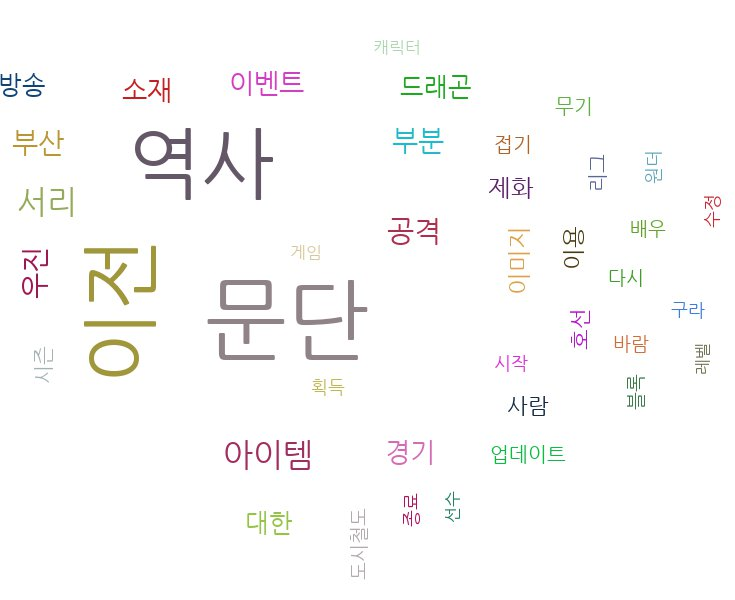

In [24]:
# pytagcloud 이미지 생성. 폰트는 나눔 고딕 사용
pytagcloud.create_tag_image(taglist, 'wordcloud.jpg', size =(800, 600), fontname = 'NanumGothic', rectangular = False)

#생성한 이미지를 jupyter notebook에서 출력
from IPython.display import Image
Image(filename = 'wordcloud.jpg')

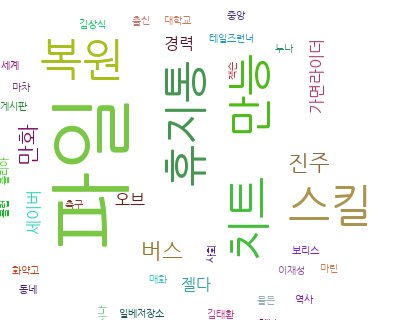

In [25]:
# title_corpus 시각화
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(title_corpus)
count = Counter(nouns)

remove_char_counter = Counter({x: count[x] for x in count if len(x) >1})
remove_char_counter = Counter({x: remove_char_counter[x] for x in count if x not in stopwords})

ranked_tags = remove_char_counter.most_common(40)
taglist = pytagcloud.make_tags(ranked_tags, maxsize = 80)
pytagcloud.create_tag_image(taglist, 'title_wordcloud.jpg', size = (400, 400), fontname = 'NanumGothic', rectangular = False)

Image(filename = 'title_wordcloud.jpg')

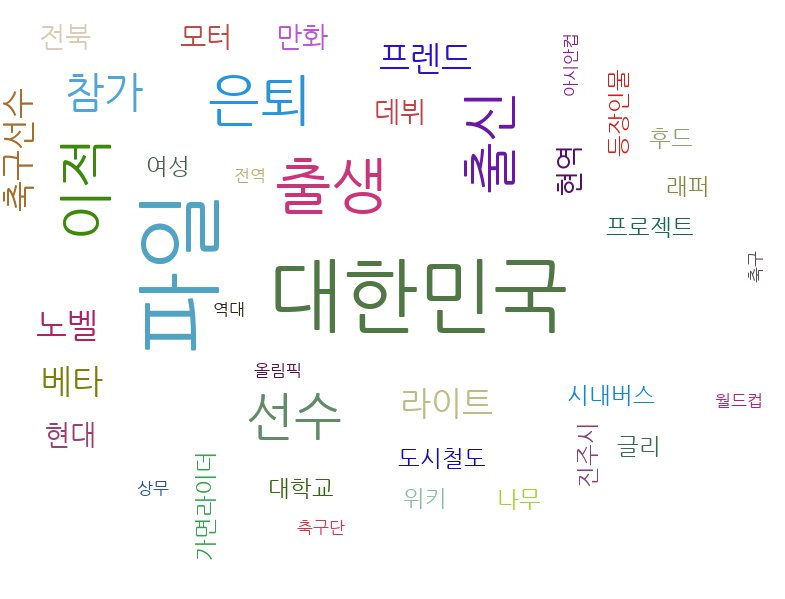

In [26]:
# category_corpus 시각화
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(category_corpus)
count = Counter(nouns)

remove_char_counter = Counter({x: count[x] for x in count if len(x) >1})
remove_char_counter = Counter({x: remove_char_counter[x] for x in count if x not in stopwords})

ranked_tags = remove_char_counter.most_common(40)
taglist = pytagcloud.make_tags(ranked_tags, maxsize = 80)
pytagcloud.create_tag_image(taglist, 'category_wordcloud.jpg', size = (800, 600), fontname = 'NanumGothic', rectangular = False)

Image(filename = 'category_wordcloud.jpg')